In [108]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import yfinance as yf
import matplotlib.pyplot as plt


In [145]:
ptf_daily_ret = np.dot(data_ret, weights)
ptf_daily_ret_df = pd.DataFrame(ptf_daily_ret, index=data_ret.index,columns=["Portfolio"])
start_balance = 10000
ptf_daily_ret_df["PnL"] = start_balance * ptf_daily_ret_df["Portfolio"]
ptf_daily_ret_df["Balance"] = start_balance + ptf_daily_ret_df["PnL"].cumsum() 

In [146]:
ptf_daily_ret_df

,Portfolio,PnL,Balance
Date,,,
2017-04-03,NaN,NaN,NaN
2017-04-04,-0.026467,-264.674107,9735.325893
2017-04-05,0.001796,17.964916,9753.290809
2017-04-06,-0.004715,-47.152244,9706.138565
2017-04-07,0.000847,8.467794,9714.606360
...,...,...,...
2022-04-25,-0.000464,-4.635921,22563.457998
2022-04-26,-0.007033,-70.326272,22493.131726
2022-04-27,0.008537,85.365675,22578.497400


In [ ]:
market cap weighted
equal weighted
risk-return optimized
volatility -weighted
factor-weighted

In [2]:
def equal_weighted(tickers):
    count = len(tickers)
    weight = 1/count
    weight_list = []
    for s in tickers:
        weight_list.append(round(weight,2))
        
    return np.array(weight_list)

def volatility_weighted(tickers,ptf_balance):
    pos_count = equal_weighted(tickers)
    allcocation = ptf_balance / pos_count
    atr = 3
    weight_list = []
    for s in tickers:
        weight = (allcocation / 1) / (atr*1)
        weight_list.append(weight)
    return weight_list
    

In [190]:
t_list = ["SPY","LEN","BTU","HIG","PBR"]
volatility_weighted(t_list,10000)

[array([16666.66666667, 16666.66666667, 16666.66666667, 16666.66666667,
        16666.66666667]),
 array([16666.66666667, 16666.66666667, 16666.66666667, 16666.66666667,
        16666.66666667]),
 array([16666.66666667, 16666.66666667, 16666.66666667, 16666.66666667,
        16666.66666667]),
 array([16666.66666667, 16666.66666667, 16666.66666667, 16666.66666667,
        16666.66666667]),
 array([16666.66666667, 16666.66666667, 16666.66666667, 16666.66666667,
        16666.66666667])]

In [183]:
t_list = ["SPY","LEN","BTU","HIG","PBR"]
equal_weighted(t_list)

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [147]:
symbol_data = data

symbol_data.columns

for s in symbol_data.columns:
   for w in ptf_weights:
      symbol_data[s+"_units"] = 0
      symbol_data[s+"_daily_ret"] = symbol_data[s].pct_change()
      symbol_data[s+"_units"].iloc[0] = (start_balance/w)

C:\Users\tomas\AppData\Local\Temp\ipykernel_57480\1814035466.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data[s+"_units"].iloc[0] = (start_balance/w)
C:\Users\tomas\AppData\Local\Temp\ipykernel_57480\1814035466.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data[s+"_units"].iloc[0] = (start_balance/w)
C:\Users\tomas\AppData\Local\Temp\ipykernel_57480\1814035466.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [141]:
symbol_data

,BTU,HIG,LEN,PBR,SPY,BTU_units,BTU_daily_ret,HIG_units,HIG_daily_ret,LEN_units,LEN_daily_ret,PBR_units,PBR_daily_ret,SPY_units,SPY_daily_ret
Date,,,,,,,,,,,,,,,
2017-04-03,28.035328,41.941101,47.419956,4.284737,212.056549,50000,NaN,50000,NaN,50000,NaN,50000,NaN,50000,NaN
2017-04-04,24.643959,41.749386,47.168465,4.372629,212.191711,0,-0.120968,0,-0.004571,0,-0.005303,0,0.020513,0,0.000637
2017-04-05,25.322233,41.618683,47.168465,4.302314,211.560959,0,0.027523,0,-0.003131,0,0.000000,0,-0.016081,0,-0.002973
2017-04-06,24.915268,41.897526,47.419956,4.249580,212.155701,0,-0.016071,0,0.006700,0,0.005332,0,-0.012257,0,0.002811
2017-04-07,24.933353,41.679691,47.205730,4.289132,211.939407,0,0.000726,0,-0.005199,0,-0.004518,0,0.009307,0,-0.001020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,24.240000,69.820099,78.273087,8.223289,421.370941,0,-0.011016,0,-0.001538,0,0.039096,0,-0.018011,0,0.005798
2022-04-26,25.510000,68.392410,75.932770,8.000059,409.167694,0,0.052393,0,-0.020448,0,-0.029899,0,-0.027146,0,-0.028961
2022-04-27,26.500000,68.441299,74.526596,8.030226,410.318176,0,0.038808,0,0.000715,0,-0.018519,0,0.003771,0,0.002812


<Axes: xlabel='Date'>

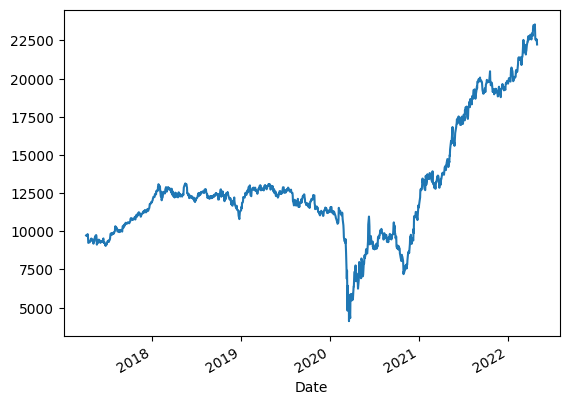

In [75]:
ptf_daily_ret_df["Balance"].plot()

<Axes: xlabel='Date'>

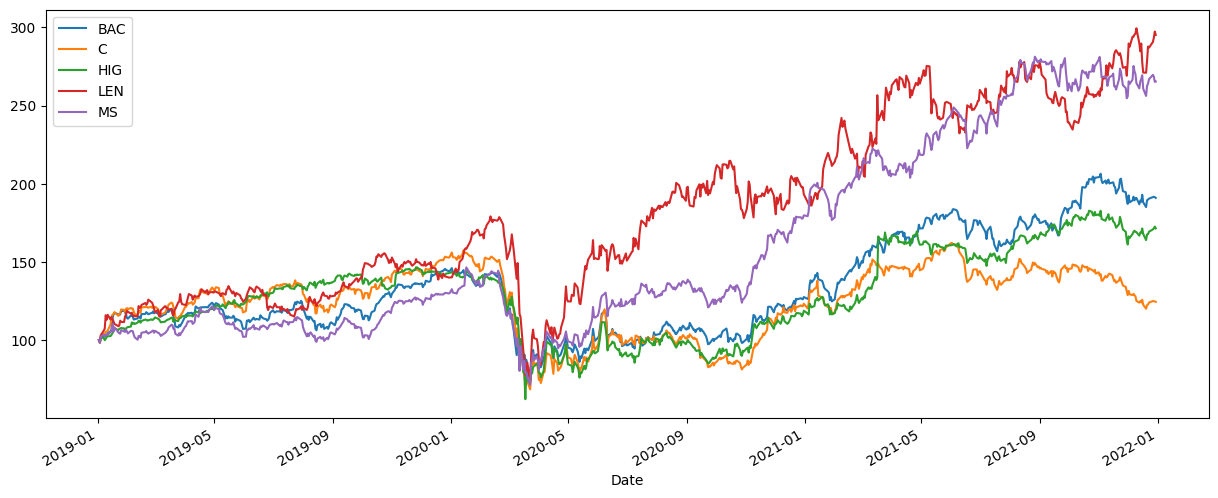

In [19]:
(data /data.iloc[0]*100).plot(figsize = (15,6))

[*********************100%***********************]  5 of 5 completed


<Axes: xlabel='Date'>

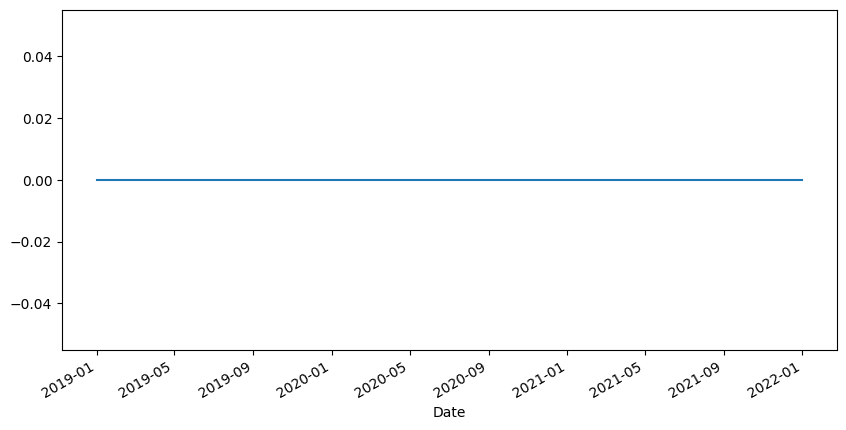

In [1]:

import pandas as pd
import numpy as np
import yfinance as yf

# Načtení dat o akciích
tickers = "SPY LEN BTU HIG PBR"
start_date = '2019-01-01'
end_date = '2021-12-31'
prices = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Výpočet relativních vah pro každou akcii
weights = np.array([0.20, 0.20, 0.20, 0.20,0.20])

# Vytvoření prázdného DataFrame pro uchování pozic
tickers = ["SPY","LEN","BTU","HIG","PBR"]
positions = pd.DataFrame(index=prices.index, columns=tickers)

# Rebalancování portfolia každý měsíc
for date, price_data in prices.resample('M'):
    # Výpočet hodnoty portfolia
    portfolio_value = (price_data * positions.fillna(1)).sum(axis=1)

    # Výpočet počtu akcií pro každou akcii v portfoliu
    target_positions = (weights * portfolio_value[-1] / price_data.iloc[-1]).round(0)

    # Uložení nových pozic do DataFrame
    positions.loc[date] = target_positions

# Vykreslení vývoje hodnoty portfolia
portfolio_value = (prices * positions.fillna(0)).sum(axis=1)
portfolio_value.plot(figsize=(10,5))


In [5]:

import pandas as pd
import numpy as np
import yfinance as yf
stock_list = ['BAC', 'C', 'HIG', 'LEN', 'MS'] #Input
start_date = '2019-01-01' #Input
end_date = '2021-12-31'#Input
##########################################
#print('stock_list:', stock_list)
data = yf.download(stock_list, start=start_date, end=end_date)["Adj Close"]
#print('data fields downloaded:',       set(data.columns.get_level_values(0)))
data.head()
weights = equal_weighted(stock_list)
positions = pd.DataFrame(index=data.index, columns=stock_list)
print('weights:', weights)

[*********************100%***********************]  5 of 5 completed
weights: [0.2 0.2 0.2 0.2 0.2]


In [7]:
for date, price_data in data.resample('M'):
    # Výpočet hodnoty portfolia
    portfolio_value = (price_data * positions.fillna(0)).sum(axis=1)
    


In [8]:
portfolio_value

Date
2019-01-02    0.0
2019-01-03    0.0
2019-01-04    0.0
2019-01-07    0.0
2019-01-08    0.0
             ... 
2021-12-23    0.0
2021-12-27    0.0
2021-12-28    0.0
2021-12-29    0.0
2021-12-30    0.0
Length: 756, dtype: float64

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

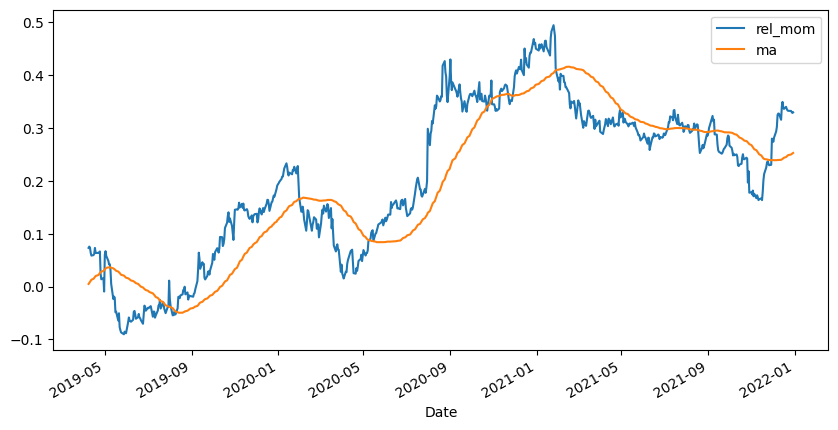

In [251]:
import pandas as pd
import yfinance as yf

# Načtení dat o akciích
ticker1 = 'AAPL'
ticker2 = 'MSFT'
start_date = '2019-01-01'
end_date = '2021-12-31'
prices1 = yf.download(ticker1, start=start_date, end=end_date)['Adj Close']
prices2 = yf.download(ticker2, start=start_date, end=end_date)['Adj Close']

# Výpočet relativních výnosů
returns1 = prices1.pct_change(1).cumsum()
returns2 = prices2.pct_change(1).cumsum()

# Výpočet relativního momentu
relative_momentum = pd.Series(returns1 - returns2, name='Relative Momentum')
#relative_momentum["MA"] = relative_momentum.loc['Relative Momentum'].rolling(window=5).mean()
strategy_table = pd.DataFrame(index=relative_momentum.index)
strategy_table["rel_mom"] = relative_momentum
strategy_table["ma"] = strategy_table["rel_mom"].rolling(window=66).mean()
strategy_table.dropna(inplace=True)
# Vykreslení grafu relativního momentu
strategy_table.plot(figsize=(10,5))

In [248]:
strategy_table

,rel_mom,ma
Date,,
2019-01-02,NaN,NaN
2019-01-03,-0.062820,NaN
2019-01-04,-0.066639,NaN
2019-01-07,-0.070141,NaN
2019-01-08,-0.058328,NaN
...,...,...
2021-12-23,0.332623,0.335743
2021-12-27,0.332412,0.334970
2021-12-28,0.330149,0.332965


In [2]:
import yfinance as yf

# Nastavení symbolu akcie
symbol = "AAPL"

# Stažení dat z Yahoo Finance
data = yf.download(symbol, period="1d")

# Vypsání poslední ceny akcie
last_price = data["Close"][-1]
print(f"Poslední cena akcie {symbol}: {last_price:.2f}")

[*********************100%***********************]  1 of 1 completed
Poslední cena akcie AAPL: 172.57


In [126]:
# Načtení dat o akciích

ticker2 = 'MSFT'
start_date = '2019-01-01'
end_date = '2021-12-31'
prices2 = yf.download(ticker2, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [136]:
data = prices2.reset_index()
data["pk"] = "0"
data.columns  = data.columns.str.lower()


In [137]:
data

,date,open,high,low,close,adj close,volume,pk
0,2019-01-02,99.550003,101.750000,98.940002,101.120003,96.632652,35329300,0
1,2019-01-03,100.099998,100.190002,97.199997,97.400002,93.077751,42579100,0
2,2019-01-04,99.720001,102.510002,98.930000,101.930000,97.406700,44060600,0
3,2019-01-07,101.639999,103.269997,100.980003,102.059998,97.530952,35656100,0
4,2019-01-08,103.040001,103.970001,101.709999,102.800003,98.238121,31514400,0
...,...,...,...,...,...,...,...,...
751,2021-12-23,332.750000,336.390015,332.730011,334.690002,330.754578,19617800,0
752,2021-12-27,335.459991,342.480011,335.429993,342.450012,338.423340,19947000,0
753,2021-12-28,343.149994,343.809998,340.320007,341.250000,337.237457,15661500,0
754,2021-12-29,341.299988,344.299988,339.679993,341.950012,337.929260,15042000,0


In [131]:
print(data)

          Date        Open        High         Low       Close   Adj Close   
0   2019-01-02   99.550003  101.750000   98.940002  101.120003   96.632652  \
1   2019-01-03  100.099998  100.190002   97.199997   97.400002   93.077751   
2   2019-01-04   99.720001  102.510002   98.930000  101.930000   97.406700   
3   2019-01-07  101.639999  103.269997  100.980003  102.059998   97.530952   
4   2019-01-08  103.040001  103.970001  101.709999  102.800003   98.238121   
..         ...         ...         ...         ...         ...         ...   
751 2021-12-23  332.750000  336.390015  332.730011  334.690002  330.754578   
752 2021-12-27  335.459991  342.480011  335.429993  342.450012  338.423340   
753 2021-12-28  343.149994  343.809998  340.320007  341.250000  337.237457   
754 2021-12-29  341.299988  344.299988  339.679993  341.950012  337.929260   
755 2021-12-30  341.910004  343.130005  338.820007  339.320007  335.330139   

       Volume  
0    35329300  
1    42579100  
2    44060600  

In [110]:

records = data.to_dict(orient='records')


In [113]:
records

[{'Date': Timestamp('2019-01-02 00:00:00'),
  'Open': 99.55000305175781,
  'High': 101.75,
  'Low': 98.94000244140625,
  'Close': 101.12000274658203,
  'Adj Close': 96.63265991210938,
  'Volume': 35329300},
 {'Date': Timestamp('2019-01-03 00:00:00'),
  'Open': 100.0999984741211,
  'High': 100.19000244140625,
  'Low': 97.19999694824219,
  'Close': 97.4000015258789,
  'Adj Close': 93.0777359008789,
  'Volume': 42579100},
 {'Date': Timestamp('2019-01-04 00:00:00'),
  'Open': 99.72000122070312,
  'High': 102.51000213623047,
  'Low': 98.93000030517578,
  'Close': 101.93000030517578,
  'Adj Close': 97.4067153930664,
  'Volume': 44060600},
 {'Date': Timestamp('2019-01-07 00:00:00'),
  'Open': 101.63999938964844,
  'High': 103.2699966430664,
  'Low': 100.9800033569336,
  'Close': 102.05999755859375,
  'Adj Close': 97.53093719482422,
  'Volume': 35656100},
 {'Date': Timestamp('2019-01-08 00:00:00'),
  'Open': 103.04000091552734,
  'High': 103.97000122070312,
  'Low': 101.70999908447266,
  'Clos

In [115]:
list(map(str.lower,records))

TypeError: descriptor 'lower' for 'str' objects doesn't apply to a 'dict' object

In [76]:
my_list = []

for i in index:
    my_dict = {}
    my_dict["Date"] = i
    my_list.append(my_dict)


In [88]:
index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=756, freq=None)

In [89]:
for d in index:
    print(d)

2019-01-02 00:00:00
2019-01-03 00:00:00
2019-01-04 00:00:00
2019-01-07 00:00:00
2019-01-08 00:00:00
2019-01-09 00:00:00
2019-01-10 00:00:00
2019-01-11 00:00:00
2019-01-14 00:00:00
2019-01-15 00:00:00
2019-01-16 00:00:00
2019-01-17 00:00:00
2019-01-18 00:00:00
2019-01-22 00:00:00
2019-01-23 00:00:00
2019-01-24 00:00:00
2019-01-25 00:00:00
2019-01-28 00:00:00
2019-01-29 00:00:00
2019-01-30 00:00:00
2019-01-31 00:00:00
2019-02-01 00:00:00
2019-02-04 00:00:00
2019-02-05 00:00:00
2019-02-06 00:00:00
2019-02-07 00:00:00
2019-02-08 00:00:00
2019-02-11 00:00:00
2019-02-12 00:00:00
2019-02-13 00:00:00
2019-02-14 00:00:00
2019-02-15 00:00:00
2019-02-19 00:00:00
2019-02-20 00:00:00
2019-02-21 00:00:00
2019-02-22 00:00:00
2019-02-25 00:00:00
2019-02-26 00:00:00
2019-02-27 00:00:00
2019-02-28 00:00:00
2019-03-01 00:00:00
2019-03-04 00:00:00
2019-03-05 00:00:00
2019-03-06 00:00:00
2019-03-07 00:00:00
2019-03-08 00:00:00
2019-03-11 00:00:00
2019-03-12 00:00:00
2019-03-13 00:00:00
2019-03-14 00:00:00


In [94]:
for r in records:
r["Date"] = d

In [95]:
records

[{'Open': 99.55000305175781,
  'High': 101.75,
  'Low': 98.94000244140625,
  'Close': 101.12000274658203,
  'Adj Close': 96.63265991210938,
  'Volume': 35329300,
  'Date': Timestamp('2021-12-30 00:00:00')},
 {'Open': 100.0999984741211,
  'High': 100.19000244140625,
  'Low': 97.19999694824219,
  'Close': 97.4000015258789,
  'Adj Close': 93.07774353027344,
  'Volume': 42579100,
  'Date': Timestamp('2021-12-30 00:00:00')},
 {'Open': 99.72000122070312,
  'High': 102.51000213623047,
  'Low': 98.93000030517578,
  'Close': 101.93000030517578,
  'Adj Close': 97.4067153930664,
  'Volume': 44060600,
  'Date': Timestamp('2021-12-30 00:00:00')},
 {'Open': 101.63999938964844,
  'High': 103.2699966430664,
  'Low': 100.9800033569336,
  'Close': 102.05999755859375,
  'Adj Close': 97.53094482421875,
  'Volume': 35656100,
  'Date': Timestamp('2021-12-30 00:00:00')},
 {'Open': 103.04000091552734,
  'High': 103.97000122070312,
  'Low': 101.70999908447266,
  'Close': 102.80000305175781,
  'Adj Close': 98.2

In [ ]:
for r in records:
    bulk_query 

In [143]:
HistoricalData(  ticker = i_obj.ticker
                                date = 
                                open = 
                                high = 
                                low = 
                                close = 
                                adj_close = 
                                volume = 
                                )

In [144]:
ticker

yfinance.Ticker object <MSFT>